In [15]:
import pandas as pd
import numpy as np

In [16]:
train_data = pd.read_csv('/media/ssd4t/misaki/Paris-City-Brain-Traffic-Flow-Forecasting/data/loop_sensor_test_x.csv')
# 假设counts是之前使用groupby('t_1h').size()计算得到的Series
counts = train_data.groupby('t_1h').size()

# 筛选数量小于1000的时间步
less_than_1000 = counts[counts > 0]

# 计算满足条件的时间步数量
number_of_time_steps = less_than_1000.count()

print("数量小于1000的时间步总数:", number_of_time_steps)


数量小于1000的时间步总数: 307


In [5]:
precesseddir = '../data/STGNN_data/'
# npz Data Load example:
def load_data(filename=f"{precesseddir}graph_data.npz"):
    # 加载 npz 文件
    data = np.load(filename)
    
    # 读取邻接矩阵
    adjacency_matrix = data['adjacency_matrix']
    
    # 重构字典
    keys = data['keys']
    values = data['values']
    index_to_iu_ac = {key: value for key, value in zip(keys, values)}
    
    return adjacency_matrix, index_to_iu_ac

# 加载数据
loaded_adj_matrix, loaded_node_mapping = load_data()

# 打印结果，验证加载
print("Loaded Adjacency Matrix:\n", loaded_adj_matrix)
print("Loaded Node Mapping:", loaded_node_mapping)

Loaded Adjacency Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Loaded Node Mapping: {0: 1223, 1: 1139, 2: 5266, 3: 5450, 4: 5417, 5: 4429, 6: 6124, 7: 5931, 8: 978, 9: 936, 10: 1757, 11: 1729, 12: 1730, 13: 1466, 14: 4022, 15: 5189, 16: 5234, 17: 5460, 18: 6086, 19: 6185, 20: 1920, 21: 710, 22: 5476, 23: 4818, 24: 1639, 25: 6624, 26: 1329, 27: 330, 28: 601, 29: 4781, 30: 5026, 31: 797, 32: 1927, 33: 6346, 34: 6216, 35: 465, 36: 980, 37: 5901, 38: 4251, 39: 6930, 40: 6877, 41: 6943, 42: 6929, 43: 6947, 44: 6267, 45: 1945, 46: 6745, 47: 4724, 48: 1850, 49: 1851, 50: 1864, 51: 1925, 52: 4064, 53: 4953, 54: 4922, 55: 1682, 56: 5689, 57: 1862, 58: 279, 59: 4665, 60: 865, 61: 179, 62: 4529, 63: 6817, 64: 1442, 65: 4019, 66: 1555, 67: 1340, 68: 1687, 69: 1629, 70: 431, 71: 1596, 72: 435, 73: 5469, 74: 4963, 75: 6801, 76: 6502, 77: 6042, 78: 1764, 79: 4477, 80: 4746, 81: 1140,

In [8]:
train_data = pd.read_csv('/media/ssd4t/misaki/Paris-City-Brain-Traffic-Flow-Forecasting/data/constructed/train_dataset_constructed.csv')
eval_data = pd.read_csv('/media/ssd4t/misaki/Paris-City-Brain-Traffic-Flow-Forecasting/data/constructed/eval_dataset_constructed.csv')
test_data = pd.read_csv('/media/ssd4t/misaki/Paris-City-Brain-Traffic-Flow-Forecasting/data/constructed/test_dataset_constructed_x.csv')

train_data.shape

(43827893, 13)

In [ ]:
# def test_and_add_constructed_features(data):
#     if data['target'] == -1:
#         data['constructed'] = 1
#     else:
#         data['constructed'] = 0
    
#     return data

# def add_constructed_features(data):
#     data['constructed'] = 0
    
#     return data

In [7]:
train_data.head()

,iu_ac,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos,etat_barre_0,etat_barre_1,etat_barre_2,etat_barre_3,target,constructed
0,3872.0,0.0,1.0,-0.974928,-0.222521,0.5,0.866025,1.0,0.0,0.0,0.0,-1.0,1
1,1709.0,0.0,1.0,-0.974928,-0.222521,0.5,0.866025,1.0,0.0,0.0,0.0,-1.0,1
2,865.0,0.0,1.0,-0.974928,-0.222521,0.5,0.866025,1.0,0.0,0.0,0.0,-1.0,1
3,1527.0,0.0,1.0,-0.974928,-0.222521,0.5,0.866025,1.0,0.0,0.0,0.0,-1.0,1
4,1879.0,0.0,1.0,-0.974928,-0.222521,0.5,0.866025,1.0,0.0,0.0,0.0,-1.0,1


In [9]:
eval_data.head()

,iu_ac,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos,etat_barre_0,etat_barre_1,etat_barre_2,etat_barre_3,target,constructed
0,1353.0,0.000000,1.000000,0.000000,1.000000,0.5,0.866025,0.0,0.0,0.0,1.0,1184.0,0
1,1353.0,0.965926,0.258819,0.781832,0.623490,0.5,0.866025,0.0,0.0,0.0,1.0,273.0,0
2,1353.0,0.500000,-0.866025,0.974928,-0.222521,0.5,0.866025,0.0,0.0,0.0,1.0,1495.0,0
3,1353.0,-0.707107,-0.707107,0.433884,-0.900969,0.5,0.866025,0.0,0.0,0.0,1.0,1612.0,0
4,1353.0,-0.866025,0.500000,-0.433884,-0.900969,0.5,0.866025,0.0,0.0,0.0,1.0,1948.0,0


In [10]:
test_data.head()

,iu_ac,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos,etat_barre_0,etat_barre_1,etat_barre_2,etat_barre_3,constructed
0,1353.0,0.000000,1.000000,0.000000,1.000000,0.5,0.866025,0.0,0.0,0.0,1.0,0
1,1353.0,0.965926,0.258819,0.781832,0.623490,0.5,0.866025,0.0,0.0,0.0,1.0,0
2,1353.0,0.500000,-0.866025,0.974928,-0.222521,0.5,0.866025,0.0,0.0,0.0,1.0,0
3,1353.0,-0.707107,-0.707107,0.433884,-0.900969,0.5,0.866025,0.0,0.0,0.0,1.0,0
4,1353.0,-0.866025,0.500000,-0.433884,-0.900969,0.5,0.866025,0.0,0.0,0.0,1.0,0


In [12]:
eval_data.shape

(439298, 13)

In [7]:
inputdir = '../data/'
# 读取数据
train_data = pd.read_csv(f'{inputdir}loop_sensor_train.csv')


In [8]:
unique_iu_ac_values = train_data['iu_ac'].nunique()
print("不同的iu_ac值的数量：", unique_iu_ac_values)

不同的iu_ac值的数量： 2030


In [9]:
# 检查每个时间戳 t_1h 有多少个相同的行
counts = train_data.groupby('t_1h').size()
# 打印结果
print(counts)   

t_1h
2022-01-01 00:00:00    1712
2022-01-01 01:00:00    1710
2022-01-01 02:00:00    1708
2022-01-01 03:00:00    1715
2022-01-01 04:00:00    1715
                       ... 
2024-01-14 19:00:00    1443
2024-01-14 20:00:00    1438
2024-01-14 21:00:00    1425
2024-01-14 22:00:00    1432
2024-01-14 23:00:00    1430
Length: 15896, dtype: int64


In [44]:
print(15896* 2030)

32268880


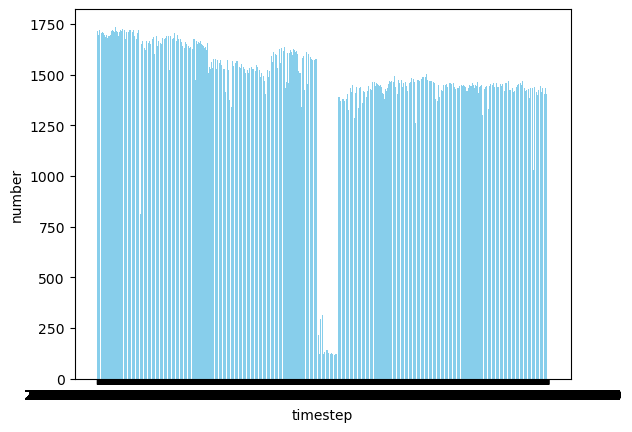

In [17]:
import matplotlib.pyplot as plt

counts = train_data.groupby('t_1h').size()

# 绘制柱状图
plt.bar(counts.index, counts.values, color='skyblue')

# 添加标题和标签
plt.xlabel('timestep')
plt.ylabel('number')

# 显示图形
plt.show()

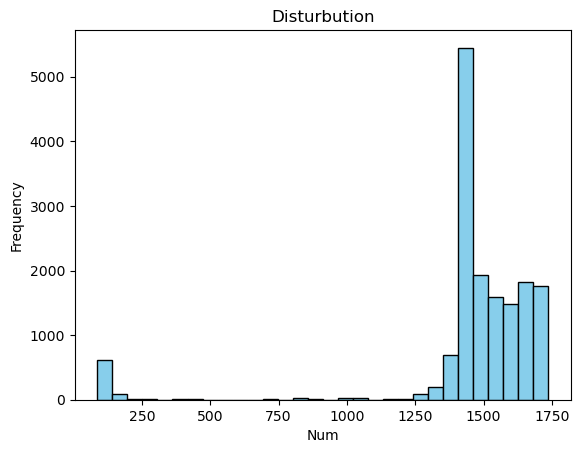

In [42]:
# 假设counts是之前使用groupby('t_1h').size()计算得到的Series
counts = train_data.groupby('t_1h').size()

# 绘制直方图
plt.hist(counts.values, bins=30, color='skyblue', edgecolor='black')

# 添加标题和标签
plt.title('Disturbution')
plt.xlabel('Num')
plt.ylabel('Frequency')

# 显示图形
plt.show()


In [10]:
# 假设counts是之前使用groupby('t_1h').size()计算得到的Series
counts = train_data.groupby('t_1h').size()

# 筛选数量小于1000的时间步
less_than_1000 = counts[counts > 1700]

# 计算满足条件的时间步数量
number_of_time_steps = less_than_1000.count()

print("数量小于1000的时间步总数:", number_of_time_steps)


数量小于1000的时间步总数: 1110


In [9]:
# 按行数排序，显示最多行数的时间戳
sorted_counts = counts.sort_values(ascending=False)
print(sorted_counts)

t_1h
2022-01-28 00:00:00    1737
2022-02-12 13:00:00    1737
2022-01-27 15:00:00    1737
2022-01-28 10:00:00    1737
2022-01-28 05:00:00    1737
                       ... 
2022-12-28 13:00:00     113
2022-12-15 14:00:00     112
2022-12-31 19:00:00     112
2022-12-15 20:00:00     110
2023-11-07 19:00:00      86
Length: 15896, dtype: int64


In [10]:
# 按时间戳 t_1h 计算车流量 q 的平均值
sorted_counts.mean()

1455.2355938600906

In [11]:
# 计算每个行数出现的次数
frequency_of_counts = sorted_counts.value_counts()

In [12]:
# 使用 value_counts() 来查看哪个行数出现最频繁
mode_count = sorted_counts.value_counts().idxmax()
mode_frequency = frequency_of_counts.max()  # 这是众数出现的次数
# 打印结果
print(f"The most frequent row count is: {mode_count}, which appears {mode_frequency} times.")

The most frequent row count is: 1451, which appears 186 times.
